<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

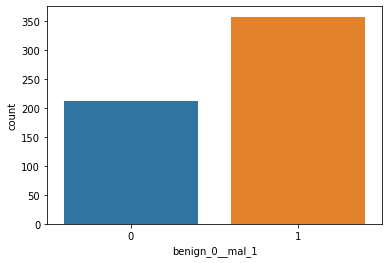

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

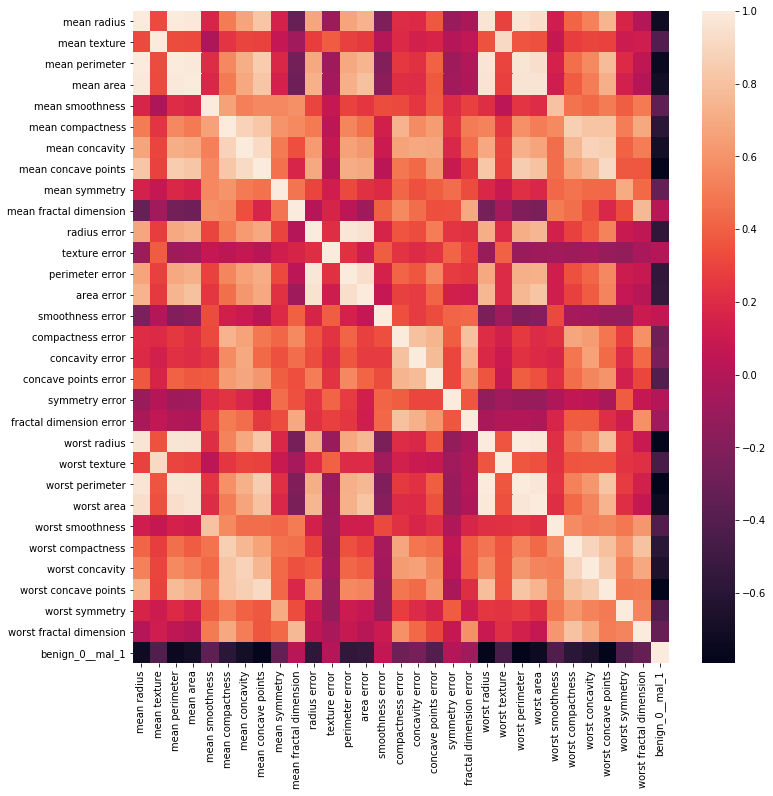

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

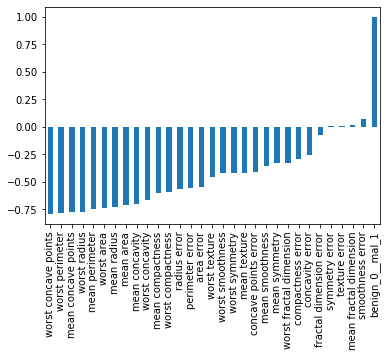

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

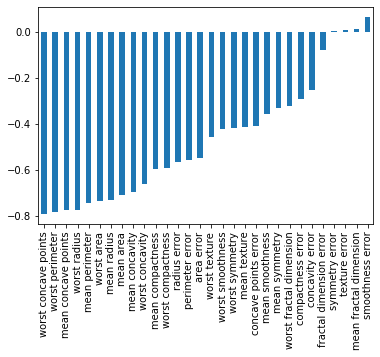

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6850 - val_loss: 0.6694
Epoch 2/600
426/426 [==============================] - 0s 146us/sample - loss: 0.6620 - val_loss: 0.6502
Epoch 3/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6433 - val_loss: 0.6305
Epoch 4/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6225 - val_loss: 0.6096
Epoch 5/600
426/426 [==============================] - 0s 132us/sample - loss: 0.6003 - val_loss: 0.5855
Epoch 6/600
426/426 [==============================] - 0s 119us/sample - loss: 0.5755 - val_loss: 0.5572
Epoch 7/600
426/426 [==============================] - 0s 121us/sample - loss: 0.5464 - val_loss: 0.5259
Epoch 8/600
426/426 [==============================] - 0s 102us/sample - loss: 0.5126 - val_loss: 0.4893
Epoch 9/600
426/426 [==============================] - 0s 230us/sample - loss: 0.4766 - val_loss: 0.4512
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0559 - val_loss: 0.1244
Epoch 79/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0561 - val_loss: 0.1154
Epoch 80/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0568 - val_loss: 0.1232
Epoch 81/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0543 - val_loss: 0.1170
Epoch 82/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0536 - val_loss: 0.1184
Epoch 83/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0529 - val_loss: 0.1221
Epoch 84/600
426/426 [==============================] - 0s 90us/sample - loss: 0.0527 - val_loss: 0.1232
Epoch 85/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0526 - val_loss: 0.1182
Epoch 86/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0534 - val_loss: 0.1288
Epoch 87/600
426/426 [==========================

Epoch 155/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0420 - val_loss: 0.1265
Epoch 156/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0417 - val_loss: 0.1311
Epoch 157/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0394 - val_loss: 0.1260
Epoch 158/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0388 - val_loss: 0.1404
Epoch 159/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0425 - val_loss: 0.1265
Epoch 160/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0404 - val_loss: 0.1266
Epoch 161/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0406 - val_loss: 0.1330
Epoch 162/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0507 - val_loss: 0.1323
Epoch 163/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0416 - val_loss: 0.1339
Epoch 164/600
426/426 [================

426/426 [==============================] - 0s 116us/sample - loss: 0.0341 - val_loss: 0.1313
Epoch 232/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0326 - val_loss: 0.1433
Epoch 233/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0302 - val_loss: 0.1325
Epoch 234/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0305 - val_loss: 0.1336
Epoch 235/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0309 - val_loss: 0.1322
Epoch 236/600
426/426 [==============================] - 0s 123us/sample - loss: 0.0297 - val_loss: 0.1438
Epoch 237/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0313 - val_loss: 0.1332
Epoch 238/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0304 - val_loss: 0.1406
Epoch 239/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0302 - val_loss: 0.1382
Epoch 240/600
426/426 [==============================

426/426 [==============================] - 0s 119us/sample - loss: 0.0248 - val_loss: 0.1514
Epoch 308/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0233 - val_loss: 0.1609
Epoch 309/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0214 - val_loss: 0.1541
Epoch 310/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0213 - val_loss: 0.1683
Epoch 311/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0227 - val_loss: 0.1545
Epoch 312/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0206 - val_loss: 0.1610
Epoch 313/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0225 - val_loss: 0.1472
Epoch 314/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0229 - val_loss: 0.1533
Epoch 315/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0208 - val_loss: 0.1538
Epoch 316/600
426/426 [=============================

Epoch 384/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0197 - val_loss: 0.1721
Epoch 385/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0179 - val_loss: 0.2096
Epoch 386/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0175 - val_loss: 0.1729
Epoch 387/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0173 - val_loss: 0.1831
Epoch 388/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0150 - val_loss: 0.1887
Epoch 389/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0150 - val_loss: 0.1857
Epoch 390/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0168 - val_loss: 0.1928
Epoch 391/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0160 - val_loss: 0.1852
Epoch 392/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0170 - val_loss: 0.1946
Epoch 393/600
426/426 [===============

426/426 [==============================] - 0s 132us/sample - loss: 0.0112 - val_loss: 0.2402
Epoch 461/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0104 - val_loss: 0.2029
Epoch 462/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0128 - val_loss: 0.2584
Epoch 463/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0133 - val_loss: 0.2181
Epoch 464/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0099 - val_loss: 0.2337
Epoch 465/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0106 - val_loss: 0.2366
Epoch 466/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0109 - val_loss: 0.2391
Epoch 467/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0122 - val_loss: 0.2163
Epoch 468/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0091 - val_loss: 0.2265
Epoch 469/600
426/426 [============================

Epoch 537/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0069 - val_loss: 0.2755
Epoch 538/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0076 - val_loss: 0.2479
Epoch 539/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0086 - val_loss: 0.3008
Epoch 540/600
426/426 [==============================] - 0s 123us/sample - loss: 0.0070 - val_loss: 0.2440
Epoch 541/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0067 - val_loss: 0.2984
Epoch 542/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0064 - val_loss: 0.2544
Epoch 543/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0061 - val_loss: 0.2883
Epoch 544/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0071 - val_loss: 0.2646
Epoch 545/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0069 - val_loss: 0.2495
Epoch 546/600
426/426 [==============

In [22]:
# model.history.history

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
# model_loss

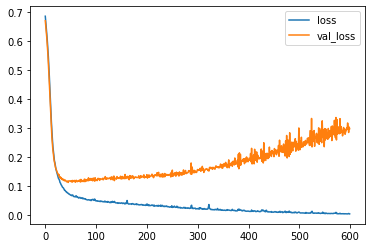

In [25]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7261 - val_loss: 0.7027
Epoch 2/600
426/426 [==============================] - 0s 126us/sample - loss: 0.6719 - val_loss: 0.6585
Epoch 3/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6338 - val_loss: 0.6199
Epoch 4/600
426/426 [==============================] - 0s 126us/sample - loss: 0.5941 - val_loss: 0.5811
Epoch 5/600
426/426 [==============================] - 0s 142us/sample - loss: 0.5551 - val_loss: 0.5429
Epoch 6/600
426/426 [==============================] - 0s 151us/sample - loss: 0.5178 - val_loss: 0.5101
Epoch 7/600
426/426 [==============================] - 0s 134us/sample - loss: 0.4881 - val_loss: 0.4817
Epoch 8/600
426/426 [==============================] - 0s 142us/sample - loss: 0.4631 - val_loss: 0.4591
Epoch 9/600
426/426 [==============================] - 0s 136us/sample - loss: 0.4433 - val_loss: 0.4394
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0516 - val_loss: 0.1180
Epoch 79/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0539 - val_loss: 0.1348
Epoch 80/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0514 - val_loss: 0.1186
Epoch 81/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0508 - val_loss: 0.1292
Epoch 00081: early stopping


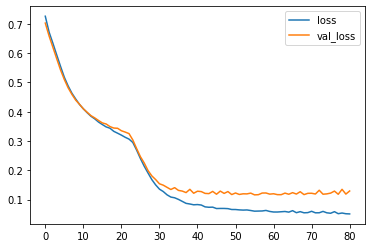

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6995 - val_loss: 0.6668
Epoch 2/600
426/426 [==============================] - 0s 138us/sample - loss: 0.6687 - val_loss: 0.6450
Epoch 3/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6560 - val_loss: 0.6193
Epoch 4/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6359 - val_loss: 0.5917
Epoch 5/600
426/426 [==============================] - 0s 116us/sample - loss: 0.6167 - val_loss: 0.5637
Epoch 6/600
426/426 [==============================] - 0s 134us/sample - loss: 0.6060 - val_loss: 0.5381
Epoch 7/600
426/426 [==============================] - 0s 118us/sample - loss: 0.5541 - val_loss: 0.5107
Epoch 8/600
426/426 [==============================] - 0s 142us/sample - loss: 0.5491 - val_loss: 0.4739
Epoch 9/600
426/426 [==============================] - 0s 146us/sample - loss: 0.5234 - val_loss: 0.4359
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 142us/sample - loss: 0.1225 - val_loss: 0.0891
Epoch 79/600
426/426 [==============================] - 0s 244us/sample - loss: 0.1100 - val_loss: 0.0797
Epoch 80/600
426/426 [==============================] - 0s 245us/sample - loss: 0.1255 - val_loss: 0.0773
Epoch 81/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0971 - val_loss: 0.0849
Epoch 82/600
426/426 [==============================] - 0s 226us/sample - loss: 0.1026 - val_loss: 0.0912
Epoch 83/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0952 - val_loss: 0.0801
Epoch 84/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0976 - val_loss: 0.0803
Epoch 85/600
426/426 [==============================] - 0s 121us/sample - loss: 0.1173 - val_loss: 0.0827
Epoch 86/600
426/426 [==============================] - 0s 257us/sample - loss: 0.0970 - val_loss: 0.0815
Epoch 87/600
426/426 [========================

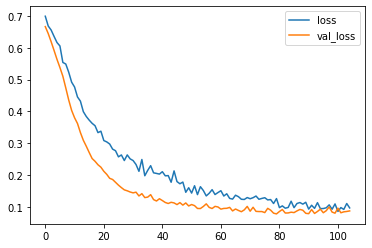

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [35]:
predictions = model.predict_classes(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
